# PyTorch Useful Methods

In [2]:
import torch

### expand: copy the given tensor and concat those at desired dimension.

In [2]:
x = torch.FloatTensor([[[1, 2]],
                       [[3, 4]]])
print(x.size())

torch.Size([2, 1, 2])


In [3]:
y = x.expand(*[2, 3, 2])  # [2,1,2]였던 x를 [2,3,2]로 expand 함.

print(y)
print(y.size())

tensor([[[1., 2.],
         [1., 2.],
         [1., 2.]],

        [[3., 4.],
         [3., 4.],
         [3., 4.]]])
torch.Size([2, 3, 2])


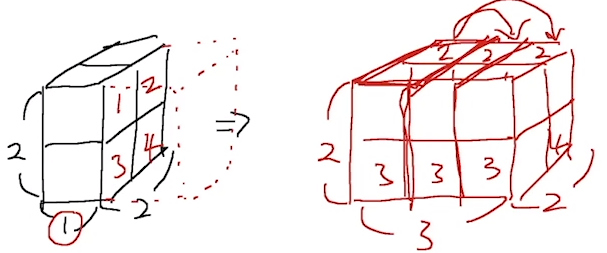

#### Implement expand with cat.

In [4]:
# 1.0.1에서 expand한 거랑 같은 역할
y = torch.cat([x, x, x], dim=1)

print(y)
print(y.size())

tensor([[[1., 2.],
         [1., 2.],
         [1., 2.]],

        [[3., 4.],
         [3., 4.],
         [3., 4.]]])
torch.Size([2, 3, 2])


### randperm: Random Permutation
- 임의의 값을 가진 순열을 만들어냄

In [3]:
x = torch.randperm(10)  # 0~9까지 값으로 구성된 임의의 순열 생성

print(x)
print(x.size())

tensor([0, 7, 8, 4, 6, 1, 9, 3, 5, 2])
torch.Size([10])


**randperm()을 index_select랑 같이 쓰면 Shuffling이 되겠네!!**
- randperm() 결과를 indice로 사용!

### argmax: Return index of maximum values

In [6]:
x = torch.randperm(3**3).reshape(3, 3, -1) 
# 3**3 = 27 개의 element들로 구성된 임의의 순열을 (3,3,-1)로 reshape하면 (3,3,3) tensor가 만들어짐

print(x)
print(x.size())

tensor([[[18,  9, 25],
         [ 0, 16,  8],
         [24, 20, 14]],

        [[ 1,  4, 17],
         [ 2, 22,  7],
         [ 5, 10, 12]],

        [[15, 13, 23],
         [ 3, 21, 19],
         [26,  6, 11]]])
torch.Size([3, 3, 3])


In [7]:
y = x.argmax(dim=-1) # x라는 tensor에서 -1 dimension(=마지막 dimension) 값이 최대인 index를 반환
# x.argmax(dim=-1) 결과 보지 않고 직접 예상해서 비교해보기


print(y)
print(y.size())

tensor([[2, 1, 0],
        [2, 1, 2],
        [2, 1, 0]])
torch.Size([3, 3])


In [1]:
x.argmax(dim=0)

NameError: name 'x' is not defined

In [ ]:
x.argmax(dim=1)

### topk: Return tuple of top-k values and indices.

- argmax는 max value의 index만 반환
- topk는 top k개의 value와 index를 반환

In [8]:
values, indices = torch.topk(x, k=1, dim=-1)
# k = 1 => top 1만 뽑아냄, dim = -1 => 마지막 dimension 기준으로

print(values.size())
print(indices.size())

torch.Size([3, 3, 1])
torch.Size([3, 3, 1])


In [ ]:
torch.topk(x, k = 1, dim =0)  # x.argmax(dim=0) 결과 이해하기 위해서 해본 거

Note that topk didn't reduce the dimension, even in $k=1$ case.

In [9]:
print(values.squeeze(-1))
print(indices.squeeze(-1))

tensor([[25, 16, 24],
        [17, 22, 12],
        [23, 21, 26]])
tensor([[2, 1, 0],
        [2, 1, 2],
        [2, 1, 0]])


In [10]:
print(x.argmax(dim=-1) == indices.squeeze(-1))

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


In [ ]:
torch.topk(x, k = 2, dim = -1)

In [11]:
_, indices = torch.topk(x, k=2, dim=-1) # k = 2로 하면 결과가 [3,3,2]
print(indices.size())

print(x.argmax(dim=-1) == indices[:, :, 0])

torch.Size([3, 3, 2])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


- 위 블록에서 indices[:, : , 0]은 top1과 같은 결과
- 위 블록에서 indices[:, :, 0]를 하면 인덱스 할 때 range로 안 하고 특정 인덱스만 딱 하나 찍어서 했기 때문에 [3,3,1]이 아니라 [3,3]이다!!!

### Sort by using topk

In [12]:
target_dim = -1
values, indices = torch.topk(x,
                             k=x.size(target_dim),   # x.size(-1): 텐서 x의 마지막 차원의 크기 => 스칼라 값임
                             largest=True)

print(values) # value 결과를 보면 -1 dim에 대해 내림차순임

tensor([[[25, 18,  9],
         [16,  8,  0],
         [24, 20, 14]],

        [[17,  4,  1],
         [22,  7,  2],
         [12, 10,  5]],

        [[23, 15, 13],
         [21, 19,  3],
         [26, 11,  6]]])


### Topk by using sort

In [13]:
k=1
values, indices = torch.sort(x, dim=-1, descending=True)
values, indices = values[:, :, :k], indices[:, :, :k]

print(values.squeeze(-1))
print(indices.squeeze(-1))

tensor([[25, 16, 24],
        [17, 22, 12],
        [23, 21, 26]])
tensor([[2, 1, 0],
        [2, 1, 2],
        [2, 1, 0]])


### masked_fill: fill the value if element of mask is True.

In [14]:
x = torch.FloatTensor([i for i in range(3**2)]).reshape(3, -1)

print(x)
print(x.size())

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
torch.Size([3, 3])


In [15]:
mask = x > 4

print(mask)

tensor([[False, False, False],
        [False, False,  True],
        [ True,  True,  True]])


In [16]:
y = x.masked_fill(mask, value=-1) # x에서 mask가 된 부분(True)은 값을 -1로!

print(y)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4., -1.],
        [-1., -1., -1.]])


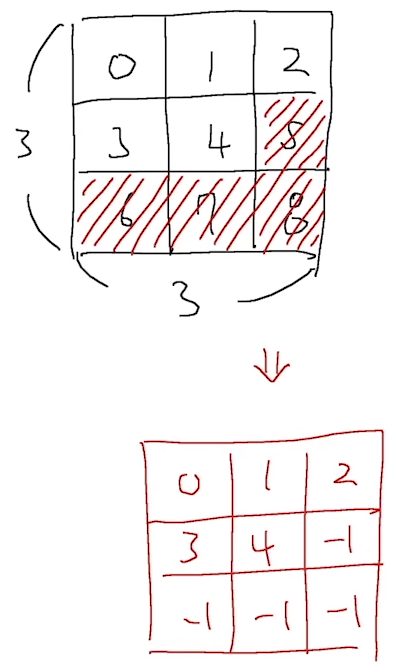

### Ones and Zeros
- 0으로 채워진 tensor를 만들거나 1로 채워진 tensor를 만들 때 사용

In [5]:
print(torch.ones(2, 3))
print(torch.zeros(2, 3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
x = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6]])
print(x.size())

torch.Size([2, 3])


In [7]:
# GPU에서 쓴 객체를 CPU에서 쓰고 싶거나 하는 등,,, 뭔 뜻인지 아직 잘 모르겠음...
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
